In [ ]:
"""
Day 1
Jack and I figured out a platform where we can use realtime collaboration to simultaneously work on our Python code. It's a pretty epic combination between Jupyter Notebooka and Google Docs TBH
"""

"\nDay 1\nJack and I figured out a platform where we can use realtime collaboration to simultaneously work on our Python code. It's a pretty epic combination between Jupyter Notebooka and Google Docs TBH\n"

In [ ]:
#GAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gas_monthly = pd.read_csv('gasmonthly_csv.csv')
gas_monthly

In [ ]:
x = np.linspace(1997 + 1/12, 2020 + 8/12, 284, 1/12).reshape(-1, 1)
y = gas_monthly['Price'].to_numpy()

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

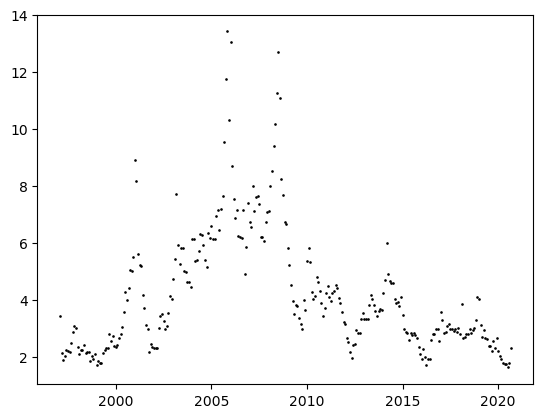

In [ ]:
plt.scatter(x, y, c='k', s = 0.8)
plt.xticks()

In [ ]:
'''from sklearn.gaussian_process.kernels import RBF

long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)'''

'from sklearn.gaussian_process.kernels import RBF\n\nlong_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)'

In [ ]:
from sklearn.gaussian_process.kernels import RBF

long_term_trend_kernel = 1.0**2 * RBF(length_scale=1.0)

In [ ]:
from sklearn.gaussian_process.kernels import ExpSineSquared
sub_kernel = (
    2.0**2
    * RBF(length_scale=50.0)
    * ExpSineSquared(length_scale=12.5, periodicity=12.5)
)

In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic

irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

In [ ]:
from sklearn.gaussian_process.kernels import WhiteKernel

noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)

In [ ]:
main_kernel = (
    sub_kernel + long_term_trend_kernel + irregularities_kernel + noise_kernel
)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

y_mean = y.mean()
gaussian_process = GaussianProcessRegressor(kernel=main_kernel, normalize_y=False)
gaussian_process.fit(x, y - y_mean)

GaussianProcessRegressor(kernel=2**2 * RBF(length_scale=50) * ExpSineSquared(length_scale=12.5, periodicity=12.5) + 1**2 * RBF(length_scale=1) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01)) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GaussianProcessRegressor GaussianProcessRegressor(kernel=2**2 * RBF(length_scale=50) * ExpSineSquared(length_scale=12.5, periodicity=12.5) + 1**2 * RBF(length_scale=1) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01))

In [ ]:
import datetime
import numpy as np

today = datetime.datetime.now()
current_month = today.year + today.month / 12
X_test = np.linspace(start=1997+1/12, stop=current_month, num=500).reshape(-1, 1)
sunnum_pred, std_sunnum_pred = gaussian_process.predict(X_test, return_std=True)

In [ ]:
recent_gas_monthly = pd.read_csv('Henry_Hub_Natural_Gas_Spot_Price.csv')


i = np.linspace(2023 + 3/12, 1997 + 1/12, 315, -1/12)
j = recent_gas_monthly["Price"]

recent_gas_monthly

Text(0, 0.5, 'Dollars per Million BTU')

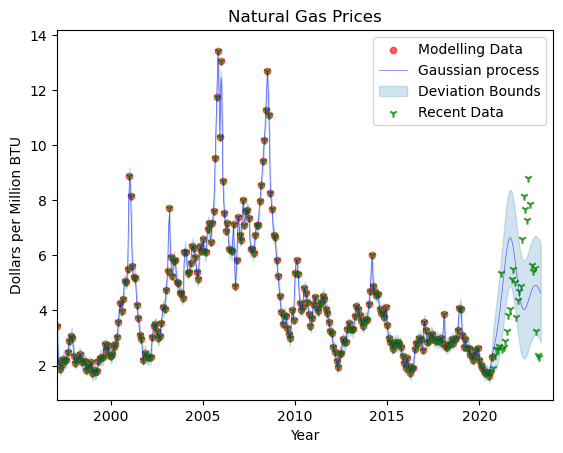

In [ ]:
plt.scatter(x, y, color="red", s = 20, alpha = 0.6, label = "Modelling Data")
plt.plot(X_test, sunnum_pred + y_mean, color="blue", alpha=0.6, label="Gaussian process", linewidth = 0.5)
plt.fill_between(
    X_test.ravel(),
    sunnum_pred - std_sunnum_pred + y_mean,
    sunnum_pred + std_sunnum_pred + y_mean, 
    color="tab:blue",
    alpha=0.2,
    label = "Deviation Bounds"
)
plt.xlim(1997 + 1/12, 2024)
plt.scatter(i, j, c = 'green', marker = "1", alpha=0.8, label = "Recent Data")
plt.title("Natural Gas Prices")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Dollars per Million BTU")